# NLP CourseWork

The Patronizing and Condescending Language Detection Task is based on the paper Don't Patronize Me! An annotated Dataset with Patronizing and Condescending Language Towards Vulnerable Communities (Perez-Almendros et al., 2020).

The aim of this task is to identify PCL, and to categorize the linguistic techniques used to express it, specifically when referring to communities identified as being vulnerable to unfair treatment in the media.

Participants are provided with sentences in context (paragraphs), extracted from news articles, in which one or several predefined vulnerable communities are mentioned. 

About the task:
The minimum linguistic unit in this task is the paragraph (i.e., sentences in context). Paragraphs are extracted from news articles from a range of outlets. These paragraphs may contain one or more instances of PCL targeting a set of predefined vulnerable communities. This challenge is divided into two subtasks.

Subtask 1: Binary classification.
Given a paragraph, a system must predict whether or not it contains any form of PCL.
Examples
In the last week of April, 1,100 migrants died or went missing off Libya in nine separate incidents. - NO PCL

People across Australia ordered pizzas to be delivered on Saturday night, with the ample leftovers donated to local homeless shelters. - PCL


Subtask 2: Multi-label classification.
Given a paragraph, a system must identify which PCL categories express the condescension. Our PCL taxonomy has been defined based on previous works on PCL. We consider the following categories:
Unbalanced power relations. The author distances themselves from the community or the situation they are talking about and expresses the will, capacity or responsibility to help those in need. It is also present when the author entitles themselves to give something positive to others in a more vulnerable situation, especially when what the author concedes is a right which they do not have any authority to decide to give. 

* Shallow solution. A simple and superficial charitable action by the privileged community is presented either as life-saving/life-changing for the unprivileged one or as a solution for a deep-rooted problem.

* Presupposition. When the author assumes a situation as certain without having all the information or generalises their or somebody else’s experience as a categorical truth without presenting a valid, trustworthy source for it (e.g. a research work or survey). The use of stereotypes or clichés is also considered to be examples of presupposition.
Authority voice. When the author stands themselves as a spokesperson of the group, or ex-plains or advises the members of a community about the community itself or a specific situation they are living.


* Metaphor. They can conceal PCL, as they cast an idea in another light, making a comparison between unrelated concepts, often with the objective of depicting a certain situation in a softer way. For the annotation of this dataset, euphemisms are considered as an example of metaphors.


* Compassion. The author presents the vulnerable individual or community as needy, raising a feeling of pity and compassion from the audience towards them. It is commonly characterized by the use of flowery wording that does not provide information, but the author enjoys the detailed and poetic description of the vulnerability.

* The poorer, the merrier. The text is focused on the community, especially on how the vulnerability makes them better (e.g. stronger, happier or more resilient) or how they share a positive attribute just for being part of a vulnerable community. People living in vulnerable situations have values to admire and learn from. The message expresses the idea of vulnerability as something beautiful o or poetic. We can think of the typical example of ‘poor people are happier because they don’t have material goods’. 

Examples
*BUSINESSMAN Norberto Quisumbing Jr. of the Norkis Group of Companies has a challenge for families who can spare some of what they have: why not adopt poor families and help them break the cycle of poverty?
why not adopt poor families and help them break the cycle of poverty? - Unbalanced_power_relations
adopt poor families - Shallow_solution
break the cycle of poverty - Metaphor


* Iain Duncan-Smith has made his feelings about benefits claimants clear: poor families are to be given pre-paid cards, loaded with payments, to make sure they spend the money on food, rather than their "self-destructive habits".


* Iain Duncan-Smith has made his feelings about benefits claimants clear: poor families are to be given pre-paid cards, loaded with payments, to make sure they spend the money on food, rather than their "self-destructive habits" - Authority_voice


poor families are to be given pre-paid cards, loaded with payments - Unbalanced_power_relations
to make sure they spend the money on food, rather than their "self-destructive habits" - Presupposition
poor families are to be given pre-paid cards, loaded with payments - Shallow_solution
 

### Binary classification.
 Given a paragraph, a system must predict whether or not it contains any form of PCL.

https://aclanthology.org/2020.coling-main.518.pdf
See paper for more details on the data set


## 1. Import the relevant libraries

In [ ]:
!pip install simpletransformers
!pip install tensorboardx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [ ]:
import random
import os
from urllib import request

#Imports for Transformers
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel, MultiLabelClassificationArgs
from urllib import request
import pandas as pd
import logging
import torch
torch.manual_seed(42)
from collections import Counter
from ast import literal_eval

# 2. Resources

In order to run this notebook, you first need the following: 

## 2.1. The _Don't Patronize Me!_ dataset

Files contained in the _Don't Patronize Me!_ data file, which you can access from [here](https://github.com/Perez-AlmendrosC/dontpatronizeme) (you need to fill a short form and it will be sent to you).

### The `dont_patronize_me.py` module

You can get this file by running the cell below.

In [ ]:
# Mount the notebook 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prepare logger
logging.basicConfig(level=logging.INFO)

transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# check gpu
cuda_available = torch.cuda.is_available()

print('Cuda available? ',cuda_available)

Cuda available?  False


In [ ]:
if cuda_available:
  import tensorflow as tf
  # Get the GPU device name.
  device_name = tf.test.gpu_device_name()
  # The device name should look like the following:
  if device_name == '/device:GPU:0':
      print('Found GPU at: {}'.format(device_name))
  else:
      raise SystemError('GPU device not found')

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


### The official scorer

The script `evaluation.py` can also be obtained by running the cell below:

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


At this point, your left pane on Google Colab should look like this:

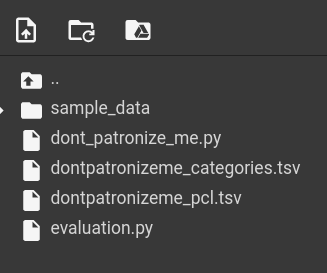

In [ ]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two areguments as input: 
# (1) Path to the directory containing the training set files, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. In this example, 
# we use the dataset for Subtask 1, which the code will load without labels.

#Use this if running on colab
dpm = DontPatronizeMe('/content/drive/MyDrive/NLPClassification_40-master', None)

#Use this if not running on colab
# dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

## 2.2. Load Subtask 1 data

Note that the original dataset contains fine-grained tags (0 to 4, both inclusive). The interface we provide collapses them into binary labels, which is the labeling we use for the task.

In [ ]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
train_df=dpm.train_task1_df
train_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


Subtask 1: Binary classification. Given a paragraph, a system must predict whether or not it contains any form of PCL. 


# 3. Data analysis

In [ ]:
# Get length of the training set
lenght=len(train_df)
print(f'The lenght of the training set is {lenght}')

The lenght of the training set is 10469


In [ ]:
train_df['label'].value_counts()
print(f'The number of examples with label 0 is {train_df["label"].value_counts()[0]}')
print(f'The number of examples with label 1 is {train_df["label"].value_counts()[1]}')

The number of examples with label 0 is 9476
The number of examples with label 1 is 993


In [ ]:
train_df['orig_label'].value_counts()
print(f'The number of examples with label 0 is {train_df["orig_label"].value_counts()[0]}')
print(f'The number of examples with label 1 is {train_df["orig_label"].value_counts()[1]}')
print(f'The number of examples with label 2 is {train_df["orig_label"].value_counts()[2]}')
print(f'The number of examples with label 3 is {train_df["orig_label"].value_counts()[3]}')
print(  f'The number of examples with label 4 is {train_df["orig_label"].value_counts()[4]}')
print(f'Labels 0 and 1 are combined to form binary label 0 -> Not patronizing')
print(f'Labels 2, 3, and 4 are combined to form binary label 1 -> Patronizing')

The number of examples with label 0 is 8529
The number of examples with label 1 is 947
The number of examples with label 2 is 458
The number of examples with label 3 is 391
The number of examples with label 4 is 144
Labels 0 and 1 are combined to form binary label 0 -> Not patronizing
Labels 2, 3, and 4 are combined to form binary label 1 -> Patronizing


In [ ]:
train_df['keyword'].value_counts()

migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: keyword, dtype: int64

## 1.1. How frequent are the class labels?

In [ ]:
# Get the number of class labels in the training set and place them in a pandas dataframe. Calculate percentage of each class label in the training set.
import pandas as pd
labels = train_df['orig_label'].value_counts()
labels = pd.DataFrame(labels)
labels = labels.reset_index()
labels.columns = ['label', 'count']
labels['percentage'] = round(((labels['count']/labels['count'].sum())*100),2)
labels


,label,count,percentage
0,0,8529,81.47
1,1,947,9.05
2,3,458,4.37
3,4,391,3.73
4,2,144,1.38


In [ ]:
# Load the train and test set
train_ids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40-master/train_semeval_parids-labels.csv')
test_ids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40-master/dev_semeval_parids-labels.csv')
train_ids

,par_id,label
0,4341,"[1, 0, 0, 1, 0, 0, 0]"
1,4136,"[0, 1, 0, 0, 0, 0, 0]"
2,10352,"[1, 0, 0, 0, 0, 1, 0]"
3,8279,"[0, 0, 0, 1, 0, 0, 0]"
4,1164,"[1, 0, 0, 1, 1, 1, 0]"
...,...,...
8370,8380,"[0, 0, 0, 0, 0, 0, 0]"
8371,8381,"[0, 0, 0, 0, 0, 0, 0]"
8372,8382,"[0, 0, 0, 0, 0, 0, 0]"
8373,8383,"[0, 0, 0, 0, 0, 0, 0]"


### 3.1 .Understand correlation between features

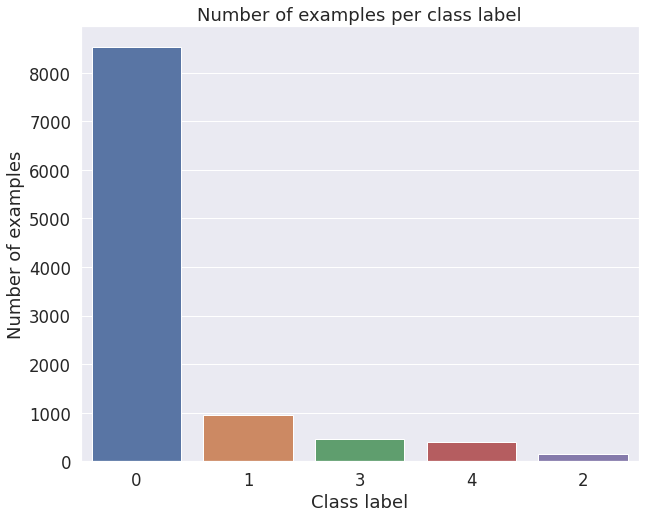

In [ ]:
# Show the correlation between the class labels and text length
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 8))
sns.barplot(x='label', y='count', data=labels)
plt.title('Number of examples per class label')
plt.xlabel('Class label')
plt.ylabel('Number of examples')
plt.show()


In [ ]:
# Create a new annotated train_df with text length for each example
annotated_train_df = train_df.copy()
annotated_train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
annotated_train_df.head()


,par_id,art_id,keyword,country,text,label,orig_label,text_length
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0,620
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0,237
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0,162
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0,162
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0,277


In [ ]:
# Create one hot vectors for each keyword in the annotated_train_df
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
annotated_train_df['keyword'] = annotated_train_df['keyword'].apply(lambda x: [x])
annotated_train_df = annotated_train_df.join(pd.DataFrame(mlb.fit_transform(annotated_train_df.pop('keyword')),
                            columns=mlb.classes_,
                            index=annotated_train_df.index))
annotated_train_df.head()

,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Count the number of stop words in each text column

from nltk.corpus import stopwords
stop = stopwords.words('english')
annotated_train_df['stopwords'] = annotated_train_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
annotated_train_df.head()


,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women,stopwords
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0,46
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0,14
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0,7
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0,10
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0,14


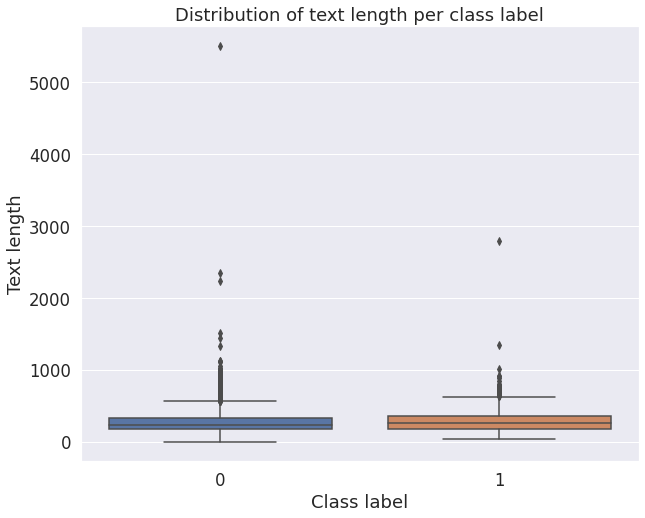

In [ ]:
#Plot the distribution of the length of the text for each class label in the annotated_train_df
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='text_length', data=annotated_train_df)
plt.title('Distribution of text length per class label')
plt.xlabel('Class label')
plt.ylabel('Text length')
plt.show()


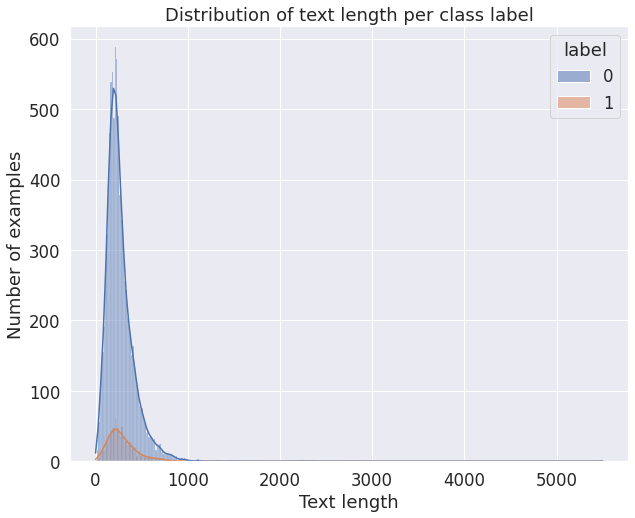

In [ ]:
# Plot the distribution of the length of the text for each class label in the annotated_train_df in a histogram
plt.figure(figsize=(10, 8))
sns.histplot(x='text_length', data=annotated_train_df, hue='label', kde=True)
plt.title('Distribution of text length per class label')
plt.xlabel('Text length')
plt.ylabel('Number of examples')
plt.show()


In [ ]:
# get the max text length from the annotated_train_df 
max_text_length = annotated_train_df['text_length'].max()
print(f'The maximum text length is {max_text_length}')

# Get the min text length from the annotated_train_df
min_text_length = annotated_train_df['text_length'].min()
print(f'The minimum text length is {min_text_length}')


The maximum text length is 5501
The minimum text length is 0


The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


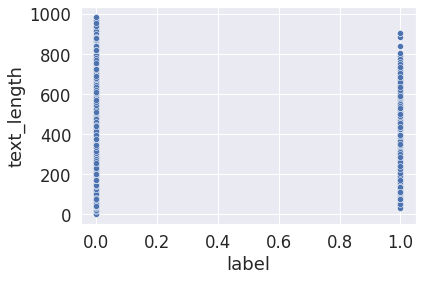

PearsonRResult(statistic=0.04208676441589505, pvalue=1.674845472820588e-05)
SignificanceResult(statistic=0.04349460190884137, pvalue=8.648911337348e-06)


In [ ]:
# Plot a correlation plot between the class labels and the keywords on the annotated_train_df
from scipy.stats import pearsonr, spearmanr
Threshold=1000

ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['text_length'][annotated_train_df['text_length'] <Threshold])
plt.show()

print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['text_length'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['text_length'][annotated_train_df['text_length'] < Threshold].tolist()))

In [ ]:
# Max and min number of stop words in the annotated_train_df
max_stopwords = annotated_train_df['stopwords'].max()
print(f'The maximum number of stop words is {max_stopwords}')

min_stopwords = annotated_train_df['stopwords'].min()
print(f'The minimum number of stop words is {min_stopwords}')


The maximum number of stop words is 300
The minimum number of stop words is 0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


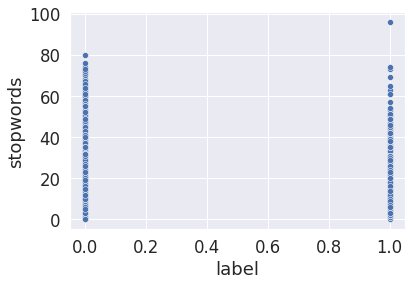

PearsonRResult(statistic=0.08655839168646402, pvalue=7.629407297918393e-19)
SignificanceResult(statistic=0.08543323898263332, pvalue=2.140302174785055e-18)


In [ ]:
# Show correlation between the class labels and the number of stop words in the annotated_train_df
Threshold=1000
ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['stopwords'][annotated_train_df['text_length'] <Threshold])
plt.show()

# Calculate the pearson and spearman correlation between the class labels and the number of stop words in the annotated_train_df
print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['stopwords'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['stopwords'][annotated_train_df['text_length'] < Threshold].tolist()))


### 3.2 Removing stop words

In [ ]:
# Remove the stop words from the annotated_train_df and create a new column called 'text_without_stopwords' in the annotated_train_df and calculate the length of the text without stop words
annotated_train_df['text_without_stopwords'] = annotated_train_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
annotated_train_df['text_without_stopwords_length'] = annotated_train_df['text_without_stopwords'].apply(lambda x: len(x))
annotated_train_df.head()


,par_id,art_id,country,text,label,orig_label,text_length,disabled,homeless,hopeless,immigrant,in-need,migrant,poor-families,refugee,vulnerable,women,stopwords,text_without_stopwords,text_without_stopwords_length
0,1,@@24942188,ph,"We 're living in times of absolute insanity , ...",0,0,620,0,0,1,0,0,0,0,0,0,0,46,"We 're living times absolute insanity , I 'm p...",452
1,2,@@21968160,gh,"In Libya today , there are countless number of...",0,0,237,0,0,0,0,0,1,0,0,0,0,14,"In Libya today , countless number Ghanaian Nig...",177
2,3,@@16584954,ie,"""White House press secretary Sean Spicer said ...",0,0,162,0,0,0,1,0,0,0,0,0,0,7,"""White House press secretary Sean Spicer said ...",134
3,4,@@7811231,nz,Council customers only signs would be displaye...,0,0,162,1,0,0,0,0,0,0,0,0,0,10,Council customers signs would displayed . Two ...,123
4,5,@@1494111,ca,""""""" Just like we received migrants fleeing El ...",0,0,277,0,0,0,0,0,0,0,1,0,0,14,""""""" Just like received migrants fleeing El Sal...",225


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


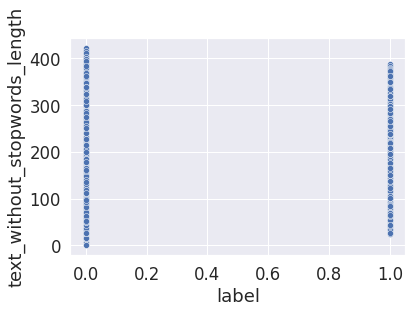

PearsonRResult(statistic=0.012436557146741734, pvalue=0.2208843789295769)
SignificanceResult(statistic=0.015074726000344077, pvalue=0.13783750080371915)


In [ ]:
# Plot the correlation between the class labels and the length of the text without stop words in the annotated_train_df
Threshold=500
ax = sns.scatterplot(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold], annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] <Threshold])

plt.show()
# Calculate the pearson and spearman correlation between the class labels and the length of the text without stop words in the annotated_train_df
print(pearsonr(annotated_train_df['label'][annotated_train_df['text_length'] <Threshold].tolist(), annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] < Threshold].tolist()))
print(spearmanr(annotated_train_df['label'][annotated_train_df['text_length'] < Threshold].tolist(), annotated_train_df['text_without_stopwords_length'][annotated_train_df['text_length'] < Threshold].tolist()))


### 3.3. Qualitative Assessment


Subjectivity and difficulty of the task with examples

In [ ]:
print(train_df[train_df['orig_label'] == '0']['text'][0])
 

We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism .


In [ ]:
train_df[train_df['orig_label'] == '1']['text'][8] 

'NUEVA ERA , Ilocos Norte - No family shall be homeless under the watch of the municipal government here , said town Mayor Aldrin Garvida .'

In [ ]:
train_df[train_df['orig_label'] == '2']['text'][178] 

'Jenny Neal , regional director of the Grandmothers Advocacy Network for Saskatchewan and Manitoba , displays her orange scarf at the sculpture Prairie Wind at River Landing , Thursday , November 24 , 2016 , to promote 16 days of orange to raise awareness about violence against women.Greg Pender / The StarPhoenix'

In [ ]:
train_df[train_df['orig_label'] == '3']['text'][33] 

'Fast food employee who fed disabled man becomes internet sensation'

In [ ]:
train_df[train_df['orig_label'] == '4']['text'][156] 

'We are alarmed to learn of your recently circulated proposals that would eviscerate the Lifeline program and leave many of the most vulnerable people in the country without access to affordable communications . As you are well aware , the Lifeline program provides a modest monthly subsidy of $9.25 to connect low-income Americans to phone and internet services . As broadband prices continue to soar , and affordability continues to suffer , adoption gaps remain . The Lifeline program has proven critical for poor families and people of color who are caught on the wrong side of the digital divide .'

The difference in values of each text is up for interpretation. For example, cases which are labelled as a 2 are given the label 1 for training and cases labelled as 1 are labelled as 0 for training. Therefore two very borderline cases can be classified completely differently using this system. In the example above a case could be made that the example labelled 2 is not PCL and therefore issues arrise within the dataset with regards to the difficulty of classification.

We can also discuss:
Binary classification task being undertaken on a multiclass/continuous problem where there are different levels of PCL.

# 4. Rearranging the data for training and testing

In [ ]:
#Use this if running on colab
from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('/content/drive/MyDrive/NLPClassification_40-master', None)


dpm.load_task1()
# dpm.load_task2(return_one_hot=True)

In [ ]:
# Use the below code if NOT using google colab
# trids = pd.read_csv('train_semeval_parids-labels.csv')
# teids = pd.read_csv('dev_semeval_parids-labels.csv')

# use the below code if using Colab
trids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40-master/train_semeval_parids-labels.csv')
teids = pd.read_csv('/content/drive/MyDrive/NLPClassification_40-master/dev_semeval_parids-labels.csv')


trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

data=dpm.train_task1_df

# The below dataframe shows all features of the data for task 1. 
#(Remember task 1 is a binary classification task which determines if text contains condesending or non condesending langauage)
data

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


## 4.1. Rebuild training set (Task 1)

In [ ]:
rows = [] # will contain par_id, label and text
for idx in range(len(trids)):  
  parid = trids.par_id[idx]
  #print(parid)
  # select row from original dataset to retrieve `text` and binary label
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'text':text,
      'label':label
  })
trdf1 = pd.DataFrame(rows)
#This is the rearraged training set
trdf1

,par_id,community,text,label
0,4341,poor-families,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,The next immediate problem that cropped up was...,1
3,8279,vulnerable,Far more important than the implications for t...,1
4,1164,poor-families,To strengthen child-sensitive social protectio...,1
...,...,...,...,...
8370,8380,refugee,Rescue teams search for survivors on the rubbl...,0
8371,8381,hopeless,The launch of ' Happy Birthday ' took place la...,0
8372,8382,homeless,"The unrest has left at least 20,000 people dea...",0
8373,8383,hopeless,You have to see it from my perspective . I may...,0


## 4.2 Rebuild test set (Task 1)

In [ ]:
rows = [] # will contain par_id, label and text
for idx in range(len(teids)):  
  parid = teids.par_id[idx]
  #print(parid)
  # select row from original dataset
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'text':text,
      'label':label
  })
tedf1 = pd.DataFrame(rows)
tedf1

,par_id,community,text,label
0,4046,hopeless,We also know that they can benefit by receivin...,1
1,1279,refugee,Pope Francis washed and kissed the feet of Mus...,1
2,8330,refugee,Many refugees do n't want to be resettled anyw...,1
3,4063,in-need,"""Budding chefs , like """" Fred """" , """" Winston ...",1
4,4089,homeless,"""In a 90-degree view of his constituency , one...",1
...,...,...,...,...
2089,10462,homeless,"The sad spectacle , which occurred on Saturday...",0
2090,10463,refugee,""""""" The Pakistani police came to our house and...",0
2091,10464,disabled,"""When Marie O'Donoghue went looking for a spec...",0
2092,10465,women,"""Sri Lankan norms and culture inhibit women fr...",0


In [ ]:
len(rows)

2094

# 5. Baseline models (BOWs)

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Take X_train and y_train
X_train = trdf1['text']
y_train = trdf1['label']

X_test = tedf1['text']
y_test = tedf1['label']

In [ ]:
# Use Bag of Words to transform X_train and X_test
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(X_train)

test_features = vectorizer.transform(X_test)

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '000m', ..., 'zuri', 'zurita', 'zyngier'],
      dtype=object)

In [ ]:
# SVM classifier
clf = LinearSVC()
clf.fit(train_features, y_train)

#Predictions on the test set
preds = clf.predict(test_features)
svm_acc = accuracy_score(y_test, preds)
svm_f1 = f1_score(y_test, preds)

# Print the accuracy and F1 score of the SVM
print('SVM:')
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds))
print('')

SVM:
Accuracy: 0.874880611270296
F1 score: 0.2841530054644809



In [ ]:
X_test 

0       We also know that they can benefit by receivin...
1       Pope Francis washed and kissed the feet of Mus...
2       Many refugees do n't want to be resettled anyw...
3       "Budding chefs , like "" Fred "" , "" Winston ...
4       "In a 90-degree view of his constituency , one...
                              ...                        
2089    The sad spectacle , which occurred on Saturday...
2090    """ The Pakistani police came to our house and...
2091    "When Marie O'Donoghue went looking for a spec...
2092    "Sri Lankan norms and culture inhibit women fr...
2093    He added that the AFP will continue to bank on...
Name: text, Length: 2094, dtype: object

In [ ]:
shortest = 10000*'a'
best_i = 99999
for i,(sample,pred,real) in enumerate(zip(X_test,preds,y_test)):
    
    if pred==0 and real==1 and len(sample)<len(shortest) and len(sample)>46:
        shortest = sample
        best_i = i
        


In [ ]:
for i,(sample,pred,real) in enumerate(zip(X_train,preds,y_test)):
    
    if 'shiver' in sample:
      print(sample)
      print(real)
      print(' ')

Hospitals fill as Rohingya refugees shiver through winter
1
 


In [ ]:
# Get the coefficient of the svm moel
coef = clf.coef_[0]

# map the coefficients to the corresponding words/features
feature_names = vectorizer.get_feature_names_out()
coef_features = list(zip(coef,feature_names))

# Sort the features based on their coefficients
sorted_features = sorted(coef_features, key=lambda x: x[0], reverse=True)

# Print the top 10 most important features
print(sorted_features[:10])

[(1.1119693441714147, 'hurdle'), (0.9406260128972781, 'dreamers'), (0.9060215653425328, 'christmas'), (0.9056337123677335, 'underprivileged'), (0.8435644304612798, 'shiver'), (0.8275216954890898, 'goal'), (0.8166953451089074, 'generation'), (0.811364170329286, 'lets'), (0.8110559665698589, 'brink'), (0.8041819436786729, 'delivered')]


**Bag of Words**

In [ ]:
# Train a XGBoost Classifier
xgboost = xgb.XGBClassifier()
xgboost.fit(train_features, y_train)

# Make predictions on the test set
preds = xgboost.predict(test_features)
xgb_acc = accuracy_score(y_test, preds)
xgb_f1 = f1_score(y_test, preds)

# Print the accuracy score
print('XGBoost:')
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds))
print('')

# Train a Multi-Layer Perceptron (MLP) classifier
clf = MLPClassifier()
clf.fit(train_features, y_train)

# Use the trained MLP classifier to make predictions on the test set
predictions = clf.predict(test_features)
mlp_acc = accuracy_score(y_test, predictions)
mlp_f1 = f1_score(y_test, predictions)

# Print the accuracy and F1 score of the MLP classifier
print('Multi-Layer Perceptron (MLP) Classifier:')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))
print('')


# Train a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(train_features, y_train)

# Use the trained Naive Bayes classifier to make predictions on the test set
nb_predictions = nb_clf.predict(test_features)
nb_acc = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Print the accuracy and F1 score of the Naive Bayes classifier
print('Multinomial Naive Bayes Classifier:')
print('Accuracy:', accuracy_score(y_test, nb_predictions))
print('F1 score:', f1_score(y_test, nb_predictions))
print('')

# SVM classifier
clf = LinearSVC()
clf.fit(train_features, y_train)

#Predictions on the test set
preds = clf.predict(test_features)
svm_acc = accuracy_score(y_test, preds)
svm_f1 = f1_score(y_test, preds)

# Print the accuracy and F1 score of the SVM
print('SVM:')
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds))
print('')


XGBoost:
Accuracy: 0.9030563514804203
F1 score: 0.15767634854771784



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Multi-Layer Perceptron (MLP) Classifier:
Accuracy: 0.894937917860554
F1 score: 0.2413793103448276

Multinomial Naive Bayes Classifier:
Accuracy: 0.9049665711556829
F1 score: 0.0

SVM:
Accuracy: 0.9040114613180515
F1 score: 0.2527881040892193



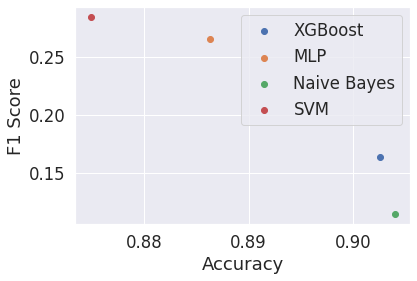

In [ ]:
#### PLOTTING ####
plt.scatter(xgb_acc,xgb_f1,label='XGBoost')
plt.scatter(mlp_acc,mlp_f1,label='MLP')
plt.scatter(nb_acc,nb_f1,label='Naive Bayes')
plt.scatter(svm_acc,svm_f1,label='SVM')
plt.legend()
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.show()



**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TF-IDF model
vectorizer = TfidfVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

In [ ]:
# Train a XGBoost Classifier
xgboost = xgb.XGBClassifier()
xgboost.fit(train_features, y_train)

# Make predictions on the test set
preds = xgboost.predict(test_features)
xgb_acc = accuracy_score(y_test, preds)
xgb_f1 = f1_score(y_test, preds)

# Print the accuracy score
print('XGBoost:')
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds))
print('')

# Train a Multi-Layer Perceptron (MLP) classifier
clf = MLPClassifier()
clf.fit(train_features, y_train)

# Use the trained MLP classifier to make predictions on the test set
predictions = clf.predict(test_features)
mlp_acc = accuracy_score(y_test, predictions)
mlp_f1 = f1_score(y_test, predictions)

# Print the accuracy and F1 score of the MLP classifier
print('Multi-Layer Perceptron (MLP) Classifier:')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))
print('')


# Train a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(train_features, y_train)

# Use the trained Naive Bayes classifier to make predictions on the test set
nb_predictions = nb_clf.predict(test_features)
nb_acc = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Print the accuracy and F1 score of the Naive Bayes classifier
print('Multinomial Naive Bayes Classifier:')
print('Accuracy:', accuracy_score(y_test, nb_predictions))
print('F1 score:', f1_score(y_test, nb_predictions))
print('')

# SVM classifier
clf = LinearSVC()
clf.fit(train_features, y_train)

#Predictions on the test set
preds = clf.predict(test_features)
svm_acc = accuracy_score(y_test, preds)
svm_f1 = f1_score(y_test, preds)

# Print the accuracy and F1 score of the SVM
print('SVM:')
print('Accuracy:', accuracy_score(y_test, preds))
print('F1 score:', f1_score(y_test, preds))
print('')



XGBoost:
Accuracy: 0.9049665711556829
F1 score: 0.06572769953051642

Multi-Layer Perceptron (MLP) Classifier:
Accuracy: 0.8863419293218721
F1 score: 0.2371794871794872

Multinomial Naive Bayes Classifier:
Accuracy: 0.9049665711556829
F1 score: 0.0

SVM:
Accuracy: 0.9040114613180515
F1 score: 0.2527881040892193



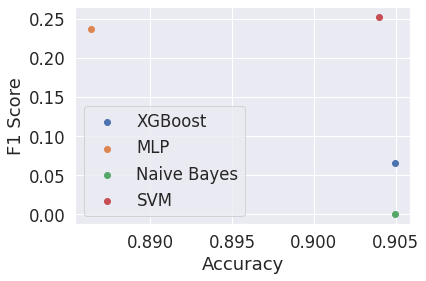

In [ ]:
#### PLOTTING ####
plt.scatter(xgb_acc,xgb_f1,label='XGBoost')
plt.scatter(mlp_acc,mlp_f1,label='MLP')
plt.scatter(nb_acc,nb_f1,label='Naive Bayes')
plt.scatter(svm_acc,svm_f1,label='SVM')
plt.legend()
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.show()


In [ ]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

# Generate predictions

In this example, our code will just generate a bunch of random predictions for both subtasks.

In [ ]:
# first, we need to create the res/ and ref/ folders, which the evaluator expects
!mkdir ref res

In [ ]:
dpm.load_test()

In [ ]:
# random predictions for task 1
preds_task1 = [[random.randint(0,1)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task1, os.path.join('res/', 'task1.txt'))

In [ ]:
# random predictions for task 2
preds_task2 = [[random.choice([0,1]) for k in range(7)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task2, os.path.join('res/', 'task2.txt'))

# Evaluate predictions

After generating two prediction files (`task1.txt` and `task2.txt`), we can just call the scorer (`evaluation.py`), which will generate a `scores.txt` file.

## Get gold labels

We will use the gold labels of the training set and compare our random predictions to them.

In [ ]:
# for subtask 1 (we convert our list of labels into a list of lists to make 
# it compatible with the labels2file function)
labels2file(dpm.train_task1_df.label.apply(lambda x:[x]).tolist(), os.path.join('ref/', 'task1.txt'))
# and for subtask 2
labels2file(dpm.train_task2_df.label.tolist(), os.path.join('ref/', 'task2.txt'))

## Call task scorer and print results

In [ ]:
# Now, we can just call the official scorer, which takes an input_directory and an output_directory
# as arguments. In this example, both will be the root directory of this notebook.
!python3 evaluation.py . .

In [ ]:
# The scorer generated a results file called "scores.txt". 
# We can now see the performance of a random baseline on the training set.
!cat scores.txt